# Simple regression problem
## About the dataset
Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.

We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. This data was published/released under CC0: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography.

The dataset consisted of 21 variables and 21613 observations.
## Task
Based on the features provided by the dataset, predict the price of the houses with Deep Learning.

### Part 1 - Data
Import the data.

Explore the data.

Preprocess the data.

Importing the visualization libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

Importing the dataset.

In [2]:
data = pd.read_csv('DATA/kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As we can see below, there are no null values in the dataset.

In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Histogram based on the price of the houses. We try to visualize what we want to predict.

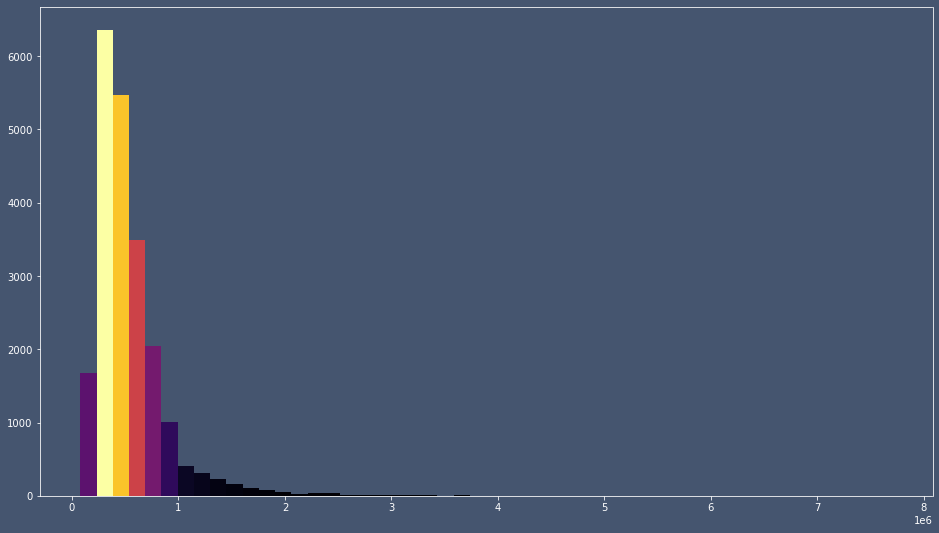

In [6]:
plt.figure(figsize = (16, 9)).patch.set_facecolor('#45556f')
plt.axes().set_facecolor('#45556f')
N, bins, patches = plt.hist(x = data['price'], bins = 50)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for this_frac, this_patch in zip(fracs, patches):
    color = plt.cm.inferno(norm(this_frac))
    this_patch.set_facecolor(color)

Showing the correlation between the price and the features and visualizing the correlated features.

In [7]:
data.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

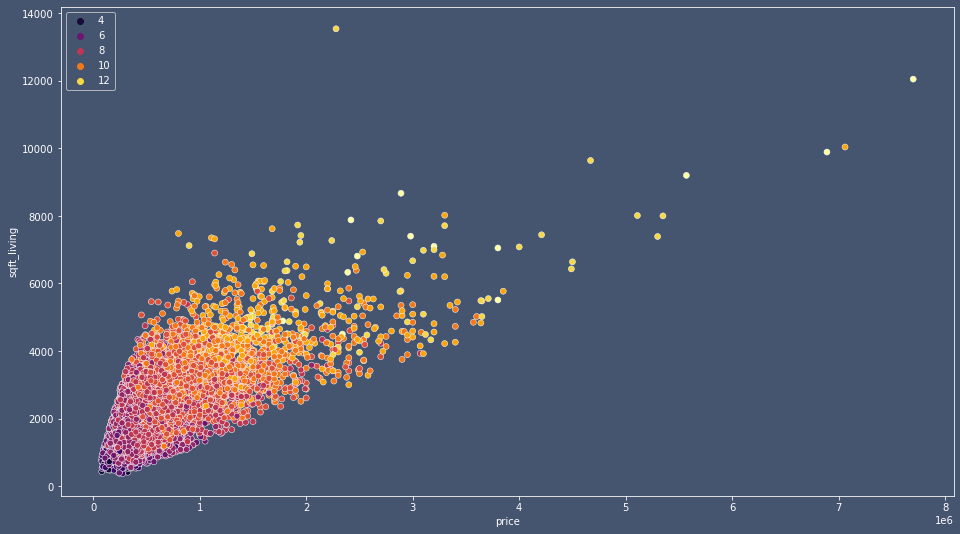

In [8]:
plt.figure(figsize = (16, 9)).patch.set_facecolor('#45556f')
plt.axes().set_facecolor('#45556f')
sns.scatterplot(x = 'price', y = 'sqft_living', data = data, hue = 'grade', palette = 'inferno')
plt.legend(facecolor = '#45556f')

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

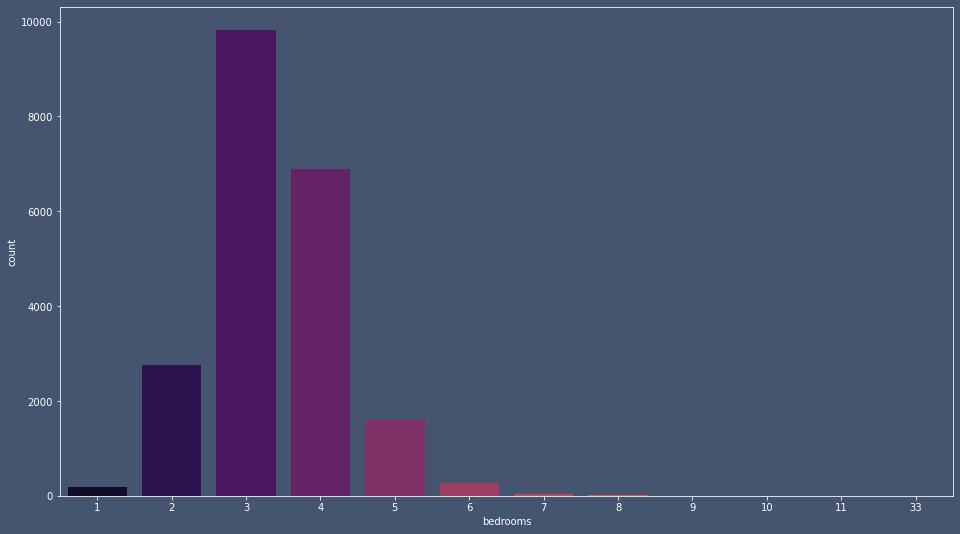

In [9]:
plt.figure(figsize = (16, 9)).patch.set_facecolor('#45556f')
plt.axes().set_facecolor('#45556f')
sns.countplot(x = 'bedrooms', data = data, palette = 'inferno')

Are there outliers? The prices are between 78.000 and 7.700.000.

If we drop 1% of the top of the data, the max price will be 1.970.000.

So there are outliers. We will make a separate dataset so we can visualize and predict better.

In [10]:
data['price'].sort_values(ascending = False).head(20)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
19002    3800000.0
7028     3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
19133    3640000.0
15241    3640000.0
Name: price, dtype: float64

In [11]:
bottom99 = data.sort_values('price', ascending = False).iloc[int(len(data) * 0.01):]

In [12]:
bottom99['price'].sort_values(ascending = False).head(20)

17221    1970000.0
6329     1970000.0
12271    1960000.0
9166     1960000.0
12565    1960000.0
1150     1960000.0
14241    1950000.0
11859    1950000.0
15144    1950000.0
556      1950000.0
18860    1950000.0
19336    1950000.0
16238    1950000.0
15363    1950000.0
6495     1940000.0
4918     1940000.0
20881    1940000.0
6493     1930000.0
9405     1930000.0
1730     1930000.0
Name: price, dtype: float64

Is there a correlation between the position on the map (lat + long) and the price?

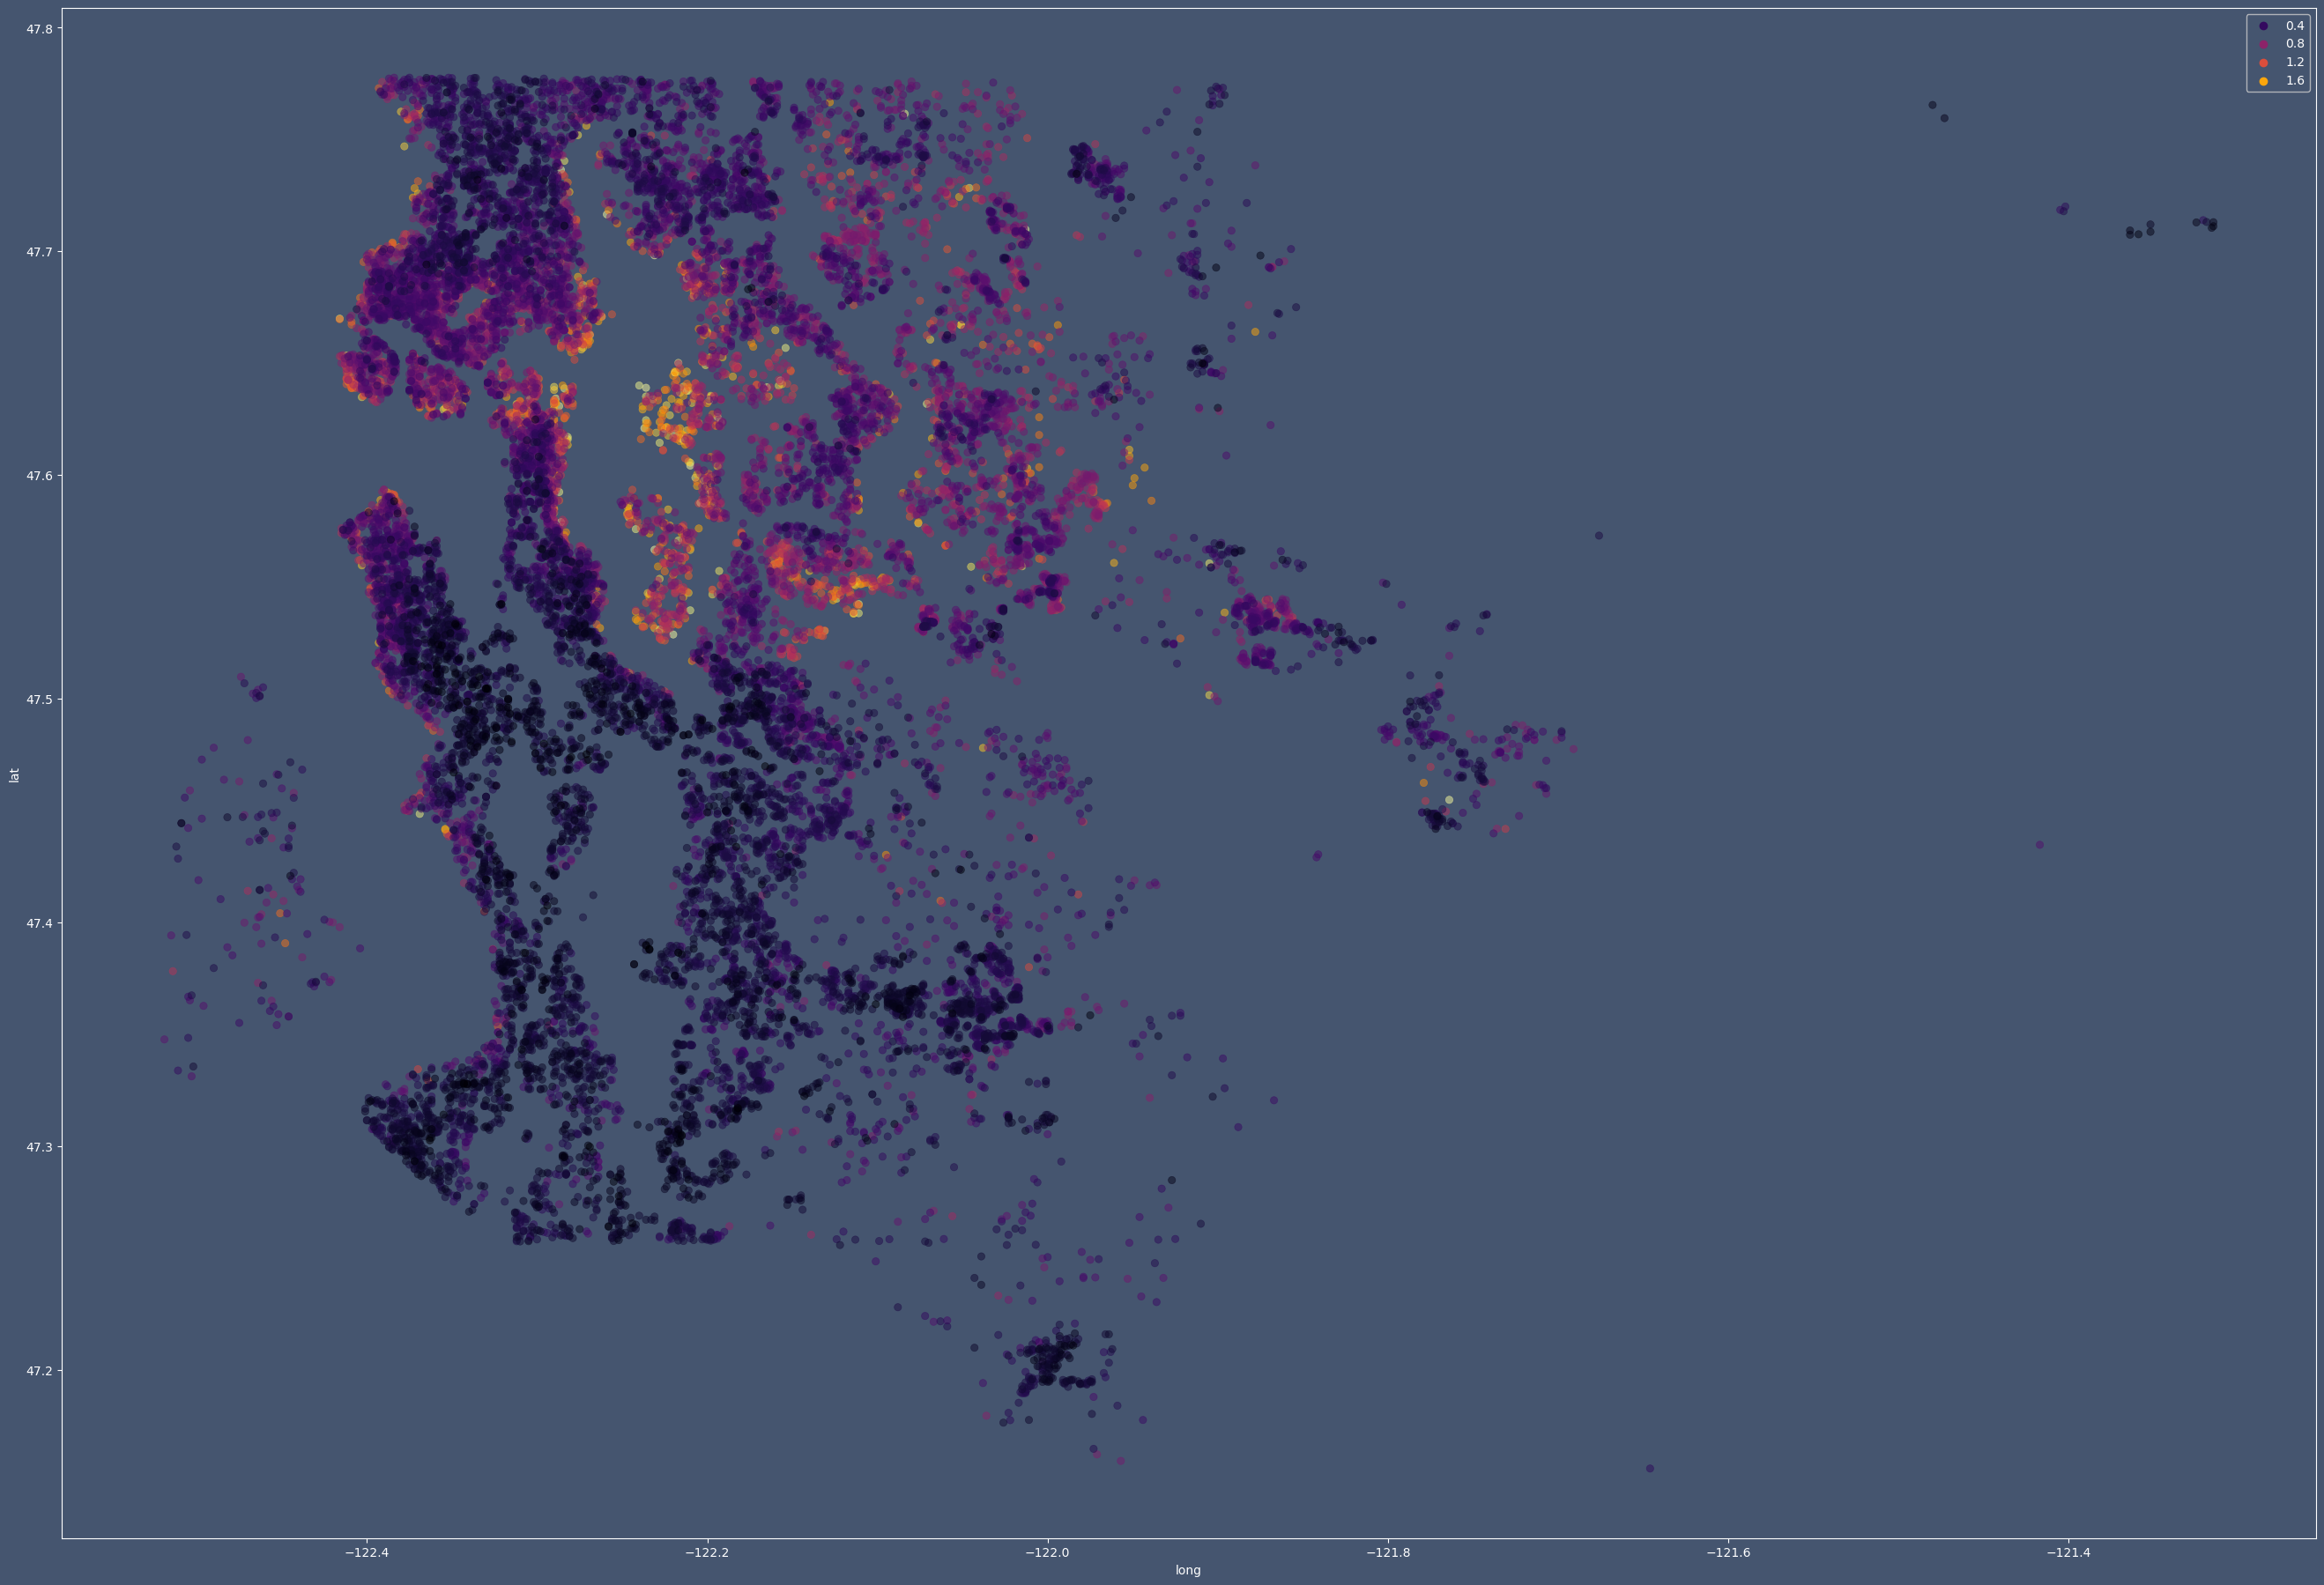

In [13]:
plt.figure(figsize = (33, 23), dpi = 100).patch.set_facecolor('#45556f')
plt.axes().set_facecolor('#45556f')
sns.scatterplot(x = 'long', y = 'lat', data = bottom99, hue = 'price', alpha = 0.5, edgecolor = None, palette = 'inferno')
plt.legend(facecolor = '#45556f')

Now we're doing some feature engineering. We have a string on the date column. We'll make 2 new columns with the year and month when the house was listed on the market.

In [14]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].apply(lambda date: date.year)
data['month'] = data['date'].apply(lambda date: date.month)

We are dropping the id, old date and zipcode columns because there is no correlation with the price.

In [15]:
data.drop(['id', 'date', 'zipcode'], axis = 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


Now we split the data in X and y. Then we split it again in training and testing data.

In [16]:
X = data.drop('price', axis = 1).values
y = data['price'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Scaling the data.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Part 2 - Model for all the data
Create the model.

Fit the model.

Predict the results.

In [19]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


There are 19 features, so we start with some dense layers with 19 neurons each.

In [20]:
model = Sequential()
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [21]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 139us/step - loss: 413229857077.5640 - val_loss: 458548362657.1852
Epoch 2/400
15117/15117 [==============================] - 1s 94us/step - loss: 411840613577.1150 - val_loss: 453502328447.6840
Epoch 3/400
15117/15117 [==============================] - 2s 124us/step - loss: 392428265649.2034 - val_loss: 406716980256.8691
Epoch 4/400
15117/15117 [==============================] - 1s 87us/step - loss: 301311011286.2393 - val_loss: 257089360509.1555
Epoch 5/400
15117/15117 [==============================] - 1s 65us/step - loss: 148524461287.7328 - val_loss: 126804846991.4864
Epoch 6/400
15117/15117 [==============================] - 1s 62us/step - loss: 93120033932.5570 - val_loss: 113964816641.8963
Epoch 7/400
15117/15117 [==============================] - 1s 57us/step - loss: 89708444835.1816 - val_loss: 111506966027.3778
Epoch 8/400
15117/15117 [==============================

15117/15117 [==============================] - 2s 136us/step - loss: 33306075326.8866 - val_loss: 42883939310.3012
Epoch 65/400
15117/15117 [==============================] - 2s 119us/step - loss: 33169970911.2993 - val_loss: 42722338492.3654
Epoch 66/400
15117/15117 [==============================] - 2s 126us/step - loss: 33071916450.3518 - val_loss: 42587779805.2346
Epoch 67/400
15117/15117 [==============================] - 2s 150us/step - loss: 32968805333.5281 - val_loss: 42418525318.0049
Epoch 68/400
15117/15117 [==============================] - 2s 147us/step - loss: 32831756083.8367 - val_loss: 42270503877.8469
Epoch 69/400
15117/15117 [==============================] - 2s 125us/step - loss: 32802936483.5541 - val_loss: 42267332279.3086
Epoch 70/400
15117/15117 [==============================] - 2s 137us/step - loss: 32698046977.8628 - val_loss: 42133457022.4198
Epoch 71/400
15117/15117 [==============================] - 2s 138us/step - loss: 32613384531.0980 - val_loss: 419171

Epoch 126/400
15117/15117 [==============================] - 3s 174us/step - loss: 30171908172.3411 - val_loss: 37896705077.0963
Epoch 127/400
15117/15117 [==============================] - 3s 179us/step - loss: 30153946972.6152 - val_loss: 37842745465.3630
Epoch 128/400
15117/15117 [==============================] - 2s 138us/step - loss: 30146383769.5797 - val_loss: 37832965471.4469
Epoch 129/400
15117/15117 [==============================] - 2s 152us/step - loss: 30089145545.6569 - val_loss: 37761195253.2543
Epoch 130/400
15117/15117 [==============================] - 2s 131us/step - loss: 30077828505.4781 - val_loss: 37700303687.4272
Epoch 131/400
15117/15117 [==============================] - 3s 174us/step - loss: 30041175191.1242 - val_loss: 37636944984.4938: 1s - loss
Epoch 132/400
15117/15117 [==============================] - 2s 148us/step - loss: 30002245406.4314 - val_loss: 37638172763.0222
Epoch 133/400
15117/15117 [==============================] - 3s 171us/step - loss: 299

15117/15117 [==============================] - 2s 151us/step - loss: 29030662749.0386 - val_loss: 35815000230.8741
Epoch 189/400
15117/15117 [==============================] - 2s 138us/step - loss: 28994081985.2574 - val_loss: 35786934590.5778
Epoch 190/400
15117/15117 [==============================] - 2s 133us/step - loss: 28978395638.3473 - val_loss: 35807817733.0568
Epoch 191/400
15117/15117 [==============================] - 2s 119us/step - loss: 28977723303.6015 - val_loss: 35739702871.2296
Epoch 192/400
15117/15117 [==============================] - 1s 92us/step - loss: 28938466252.1802 - val_loss: 35714857566.8148
Epoch 193/400
15117/15117 [==============================] - 2s 129us/step - loss: 28904030024.8356 - val_loss: 35823175836.7605
Epoch 194/400
15117/15117 [==============================] - 2s 136us/step - loss: 28921575830.1250 - val_loss: 35718814115.7136
Epoch 195/400
15117/15117 [==============================] - 3s 171us/step - loss: 28898565761.8205 - val_loss: 

15117/15117 [==============================] - 2s 142us/step - loss: 28405819579.0932 - val_loss: 34730971287.7037
Epoch 250/400
15117/15117 [==============================] - 2s 140us/step - loss: 28395486451.1128 - val_loss: 34627325365.4123
Epoch 251/400
15117/15117 [==============================] - 2s 134us/step - loss: 28371143599.6624 - val_loss: 34631778455.7037
Epoch 252/400
15117/15117 [==============================] - 2s 128us/step - loss: 28370550111.0877 - val_loss: 34611599354.9432 ETA: 0s - loss: 2976
Epoch 253/400
15117/15117 [==============================] - 2s 138us/step - loss: 28341735709.1783 - val_loss: 34616176933.2938
Epoch 254/400
15117/15117 [==============================] - 2s 110us/step - loss: 28407571444.8909 - val_loss: 34598634463.1309
Epoch 255/400
15117/15117 [==============================] - 2s 161us/step - loss: 28359356182.0319 - val_loss: 34547798440.7704
Epoch 256/400
15117/15117 [==============================] - 2s 156us/step - loss: 2836395

15117/15117 [==============================] - 2s 160us/step - loss: 28006118284.9804 - val_loss: 33863864658.8049
Epoch 312/400
15117/15117 [==============================] - 2s 153us/step - loss: 28003561221.9102 - val_loss: 33845309895.1111
Epoch 313/400
15117/15117 [==============================] - 3s 178us/step - loss: 27986170260.3977 - val_loss: 33813201603.9506
Epoch 314/400
15117/15117 [==============================] - 3s 170us/step - loss: 28032199779.7785 - val_loss: 33811196333.8272
Epoch 315/400
15117/15117 [==============================] - 2s 142us/step - loss: 28003900918.9569 - val_loss: 33789047001.4420
Epoch 316/400
15117/15117 [==============================] - 2s 145us/step - loss: 27992079109.2328 - val_loss: 33781396113.3827
Epoch 317/400
15117/15117 [==============================] - 2s 147us/step - loss: 27981887996.6470 - val_loss: 33789983675.7333
Epoch 318/400
15117/15117 [==============================] - 2s 148us/step - loss: 27980766030.9998 - val_loss:

15117/15117 [==============================] - 2s 147us/step - loss: 27685140581.4720 - val_loss: 33230196366.8543
Epoch 372/400
15117/15117 [==============================] - 2s 150us/step - loss: 27711519173.9144 - val_loss: 33261867882.8247ETA: 0s - loss: 274406
Epoch 373/400
15117/15117 [==============================] - 2s 149us/step - loss: 27679167770.8074 - val_loss: 33262417131.1407
Epoch 374/400
15117/15117 [==============================] - 2s 163us/step - loss: 27719334825.7691 - val_loss: 33190638988.9580
Epoch 375/400
15117/15117 [==============================] - 3s 176us/step - loss: 27754386048.9399 - val_loss: 33231498844.2864 - los - ETA: 0s - loss: 27793801340
Epoch 376/400
15117/15117 [==============================] - 2s 153us/step - loss: 27688370526.0716 - val_loss: 33217169716.4642
Epoch 377/400
15117/15117 [==============================] - 2s 144us/step - loss: 27679929726.5182 - val_loss: 33196641484.8000
Epoch 378/400
15117/15117 [==========================

Now we want to see how the model was fitting. The yellow line is the validation loss.

In [22]:
losses = pd.DataFrame(model.history.history)

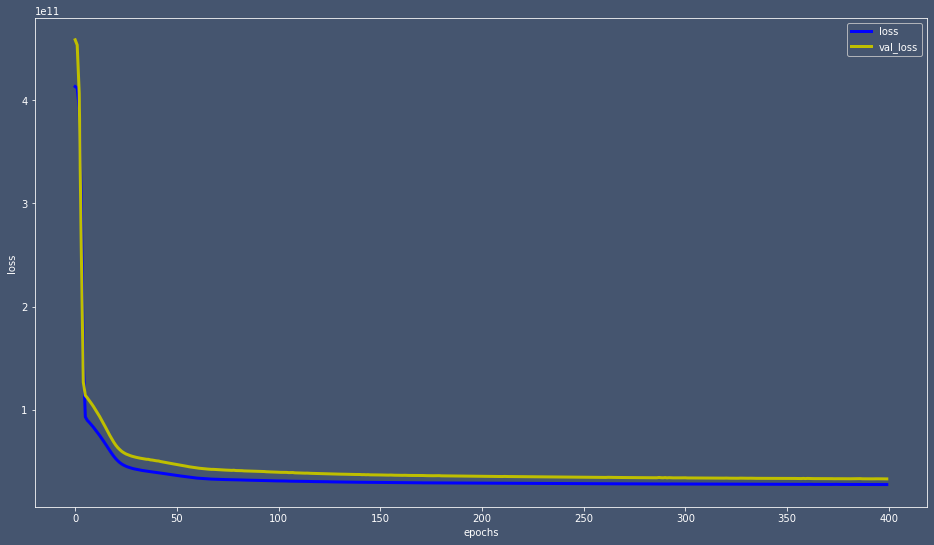

In [23]:
plt.figure(figsize = (16, 9)).patch.set_facecolor('#45556f')
plt.axes().set_facecolor('#45556f')
plt.plot(losses['loss'], color = 'b', lw = 3, label = 'loss')
plt.plot(losses['val_loss'], color = 'y', lw = 3, label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(facecolor = '#45556f')

How well the model predicted the prices? We were of by 20%

In [24]:
from sklearn.metrics import mean_absolute_error
predictions = model.predict(X_test)

In [25]:
print(mean_absolute_error(y_test, predictions))
print(data['price'].mean())
print(mean_absolute_error(y_test, predictions) / data['price'].mean() * 100)

108071.74474344136
540296.5735055795
20.002300596179023


Scatter plot with results.

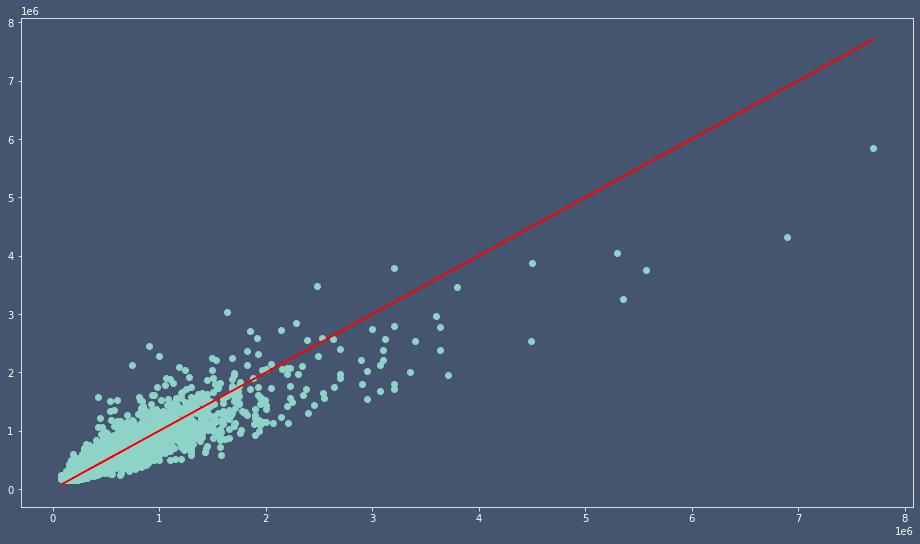

In [26]:
plt.figure(figsize = (16, 9)).patch.set_facecolor('#45556f')
plt.axes().set_facecolor('#45556f')
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, c = 'r')

Single prediction.

In [27]:
single_house = data.drop('price', axis = 1).iloc[0].values.reshape(-1, 19)
single_house = scaler.transform(single_house)
model.predict(single_house)

array([[284940.7]], dtype=float32)

In [28]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


### Part 3 - Model for only bottom 99% of the data
Create the model.

Fit the model.

Predict the results.

Same as the first model. We just want to see if this one performs better without those outliers we had.

In [29]:
bottom99['date'] = pd.to_datetime(bottom99['date'])
bottom99['year'] = bottom99['date'].apply(lambda date: date.year)
bottom99['month'] = bottom99['date'].apply(lambda date: date.month)
bottom99.drop(['id', 'date', 'zipcode'], axis = 1, inplace = True)
bottom99.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
17221,1970000.0,8,3.50,4440,6480,2.0,0,3,5,10,3140,1300,1959,0,47.6310,-122.303,4440,8640,2014,5
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4


In [30]:
X = bottom99.drop('price', axis = 1).values
y = bottom99['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
bottom99_model = Sequential()
bottom99_model.add(Dense(19, activation = 'relu'))
bottom99_model.add(Dense(19, activation = 'relu'))
bottom99_model.add(Dense(19, activation = 'relu'))
bottom99_model.add(Dense(19, activation = 'relu'))
bottom99_model.add(Dense(1))

bottom99_model.compile(optimizer = 'adam', loss = 'mse')

In [32]:
bottom99_model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

Train on 14967 samples, validate on 6415 samples
Epoch 1/400
14967/14967 [==============================] - 3s 213us/step - loss: 351194988709.2959 - val_loss: 347242981459.3247
Epoch 2/400
14967/14967 [==============================] - 3s 230us/step - loss: 349190294645.8828 - val_loss: 340116505457.1348
Epoch 3/400
14967/14967 [==============================] - 4s 261us/step - loss: 320177798710.4259 - val_loss: 274965573907.1950
Epoch 4/400
14967/14967 [==============================] - 4s 277us/step - loss: 199873116594.9965 - val_loss: 111523646741.5894
Epoch 5/400
14967/14967 [==============================] - 4s 256us/step - loss: 70833300332.8346 - val_loss: 53229689940.7613
Epoch 6/400
14967/14967 [==============================] - 4s 238us/step - loss: 53264743457.3192 - val_loss: 51950419199.5610
Epoch 7/400
14967/14967 [==============================] - 4s 298us/step - loss: 52026739032.9594 - val_loss: 50685251790.8751
Epoch 8/400
14967/14967 [=============================

14967/14967 [==============================] - 4s 265us/step - loss: 23362054644.5401 - val_loss: 23355338126.5858 1s - 
Epoch 60/400
14967/14967 [==============================] - 4s 299us/step - loss: 23288204091.5743 - val_loss: 23317926917.5869
Epoch 61/400
14967/14967 [==============================] - 5s 346us/step - loss: 23219003136.0513 - val_loss: 23266693702.8739s - lo
Epoch 62/400
14967/14967 [==============================] - 5s 351us/step - loss: 23151421278.9459 - val_loss: 23167389977.4204
Epoch 63/400
14967/14967 [==============================] - 5s 321us/step - loss: 23083838377.4523 - val_loss: 23133176265.2483
Epoch 64/400
14967/14967 [==============================] - 5s 358us/step - loss: 23021878635.5689 - val_loss: 23079567162.4630
Epoch 65/400
14967/14967 [==============================] - 5s 335us/step - loss: 22978872002.2022 - val_loss: 22995644969.2633
Epoch 66/400
14967/14967 [==============================] - 5s 331us/step - loss: 22893194743.0716 - val_

14967/14967 [==============================] - 4s 292us/step - loss: 21281292645.8219 - val_loss: 21625923701.00580
Epoch 120/400
14967/14967 [==============================] - 3s 187us/step - loss: 21269720521.5057 - val_loss: 21730470356.6616
Epoch 121/400
14967/14967 [==============================] - 3s 211us/step - loss: 21245051621.3686 - val_loss: 21808182505.9317
Epoch 122/400
14967/14967 [==============================] - 2s 135us/step - loss: 21254220615.0683 - val_loss: 21501562570.8047
Epoch 123/400
14967/14967 [==============================] - 4s 245us/step - loss: 21230622745.5880 - val_loss: 21523201554.5166
Epoch 124/400
14967/14967 [==============================] - 4s 288us/step - loss: 21235276787.0692 - val_loss: 21662356317.4210ss: 2058541840 - ETA: 0s - loss: 20683747
Epoch 125/400
14967/14967 [==============================] - 3s 192us/step - loss: 21229422111.7114 - val_loss: 21483656180.5868
Epoch 126/400
14967/14967 [==============================] - 3s 172us

14967/14967 [==============================] - 2s 149us/step - loss: 20872015705.7462 - val_loss: 21186188993.1473
Epoch 181/400
14967/14967 [==============================] - 3s 173us/step - loss: 20868879100.2200 - val_loss: 21175885731.8161
Epoch 182/400
14967/14967 [==============================] - 2s 166us/step - loss: 20864860873.5912 - val_loss: 21193179199.4513
Epoch 183/400
14967/14967 [==============================] - 3s 181us/step - loss: 20867242720.3057 - val_loss: 21158880131.7313
Epoch 184/400
14967/14967 [==============================] - 3s 206us/step - loss: 20903947061.0062 - val_loss: 21190428422.9836
Epoch 185/400
14967/14967 [==============================] - 3s 179us/step - loss: 20875645920.3228 - val_loss: 21282694478.6557
Epoch 186/400
14967/14967 [==============================] - 2s 141us/step - loss: 20843502277.7599 - val_loss: 21463195391.8803
Epoch 187/400
14967/14967 [==============================] - 2s 154us/step - loss: 20869077254.5167 - val_loss:

Epoch 242/400
14967/14967 [==============================] - 2s 163us/step - loss: 20726792134.9401 - val_loss: 21069537465.4853A: 1s - loss: 20645200042.6 - ETA: 1s
Epoch 243/400
14967/14967 [==============================] - 3s 190us/step - loss: 20714233680.1678 - val_loss: 21050129212.6179
Epoch 244/400
14967/14967 [==============================] - 4s 246us/step - loss: 20709044305.2796 - val_loss: 21114584729.4803
Epoch 245/400
14967/14967 [==============================] - 4s 248us/step - loss: 20767433770.2134 - val_loss: 21064962317.3687
Epoch 246/400
14967/14967 [==============================] - 3s 193us/step - loss: 20719136843.1221 - val_loss: 21048786352.9054
Epoch 247/400
14967/14967 [==============================] - 4s 235us/step - loss: 20711585531.7410 - val_loss: 21052369017.5551
Epoch 248/400
14967/14967 [==============================] - 3s 196us/step - loss: 20722531667.2808 - val_loss: 21079102778.6226
Epoch 249/400
14967/14967 [==============================] -

14967/14967 [==============================] - 3s 168us/step - loss: 20622267640.1491 - val_loss: 20989268804.5992oss: 20539932738.9
Epoch 304/400
14967/14967 [==============================] - 2s 143us/step - loss: 20622959447.0780 - val_loss: 20963993193.1136
Epoch 305/400
14967/14967 [==============================] - 2s 161us/step - loss: 20605651688.3790 - val_loss: 21003612502.5571ETA: 1s - l - ETA: 0s - loss: 20441
Epoch 306/400
14967/14967 [==============================] - 2s 129us/step - loss: 20608418989.7112 - val_loss: 21043581720.7021
Epoch 307/400
14967/14967 [==============================] - 3s 173us/step - loss: 20617697800.2443 - val_loss: 21068323804.2438
Epoch 308/400
14967/14967 [==============================] - 3s 231us/step - loss: 20611746538.0210 - val_loss: 20970562830.7255
Epoch 309/400
14967/14967 [==============================] - 3s 182us/step - loss: 20607791377.6687 - val_loss: 20974833035.5529
Epoch 310/400
14967/14967 [==============================]

14967/14967 [==============================] - 5s 353us/step - loss: 20539563132.4509 - val_loss: 20922923499.8073
Epoch 363/400
14967/14967 [==============================] - 6s 393us/step - loss: 20558981319.7098 - val_loss: 20940634474.5104
Epoch 364/400
14967/14967 [==============================] - 5s 338us/step - loss: 20530199340.3856 - val_loss: 20959564328.3055
Epoch 365/400
14967/14967 [==============================] - 6s 426us/step - loss: 20542165113.7826 - val_loss: 20931984215.7543
Epoch 366/400
14967/14967 [==============================] - 6s 401us/step - loss: 20541037513.3347 - val_loss: 21198384139.4931
Epoch 367/400
14967/14967 [==============================] - 5s 337us/step - loss: 20564281447.0363 - val_loss: 20936393513.7821
Epoch 368/400
14967/14967 [==============================] - 6s 413us/step - loss: 20541524892.3162 - val_loss: 20924191667.6988
Epoch 369/400
14967/14967 [==============================] - 5s 359us/step - loss: 20529715235.0296 - val_loss:

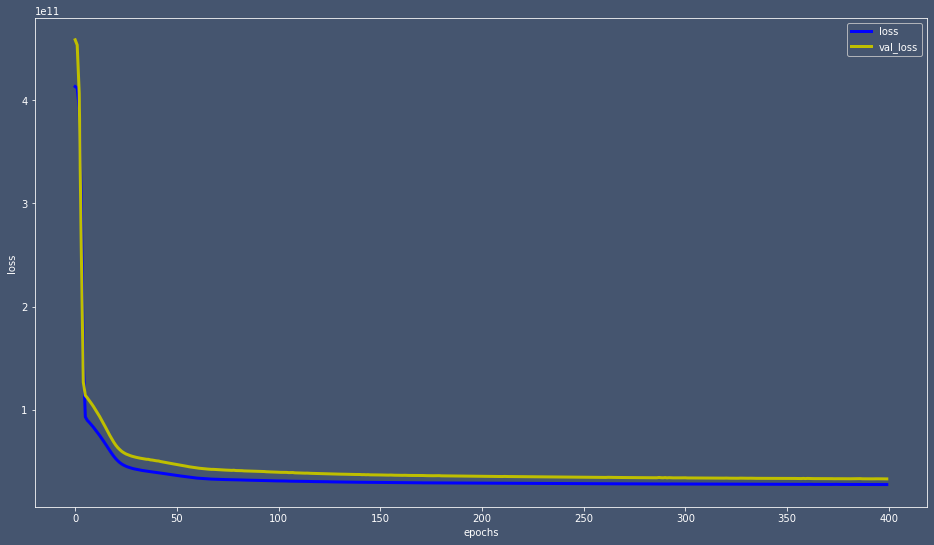

In [33]:
plt.figure(figsize = (16, 9)).patch.set_facecolor('#45556f')
plt.axes().set_facecolor('#45556f')
plt.plot(losses['loss'], color = 'b', lw = 3, label = 'loss')
plt.plot(losses['val_loss'], color = 'y', lw = 3, label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(facecolor = '#45556f')

In [34]:
predictions = bottom99_model.predict(X_test)

This model performed a little better. We were off by 18%.

In [35]:
print(mean_absolute_error(y_test, predictions))
print(data['price'].mean())
print(mean_absolute_error(y_test, predictions) / data['price'].mean() * 100)

98159.35109606391
540296.5735055795
18.1676797354426


Scatter plot for results.

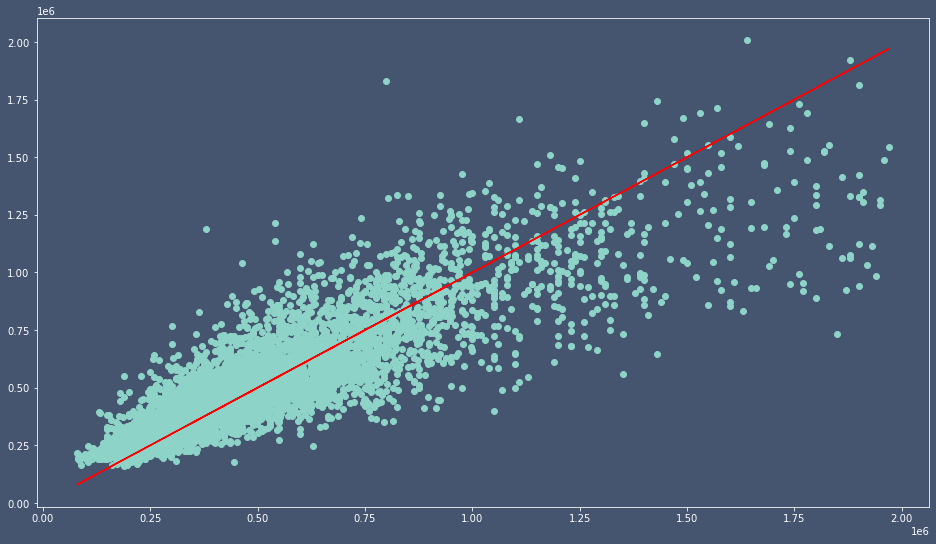

In [36]:
plt.figure(figsize = (16, 9)).patch.set_facecolor('#45556f')
plt.axes().set_facecolor('#45556f')
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, c = 'r')